In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib widget

In [6]:
df = pd.read_table('./data_sets/web-indochina-2004/web-indochina-2004 - Copy.mtx', sep = ' ')#, names = ['A','B'], skiprows= 2)
df

,A,B
0,551,1
1,11338,1
2,70,2
3,71,2
4,414,2
...,...,...
47601,11354,11352
47602,11355,11352
47603,11354,11353
47604,11355,11353


In [7]:
G = nx.from_pandas_edgelist(df, source = 'A', target = 'B')

In [8]:
fig, ax = plt.subplots()


pos = nx.spring_layout(G, seed=100)

pageranks = nx.pagerank(G)
pagerank_vals = [pageranks[key] for key in pageranks.keys()]

# nx.draw_networkx_edges(G, pos, alpha=0.005)
nx.draw_networkx_nodes(
    G,
    pos,
    # nodelist=list(p.keys()),
    node_size=8,
    node_color=pagerank_vals,
    cmap=plt.cm.Reds_r,
)


# nx.draw_circular(G, node_color = pagerank_vals, cmap = plt.cm.Blues, node_size = 8, edge_)#, pos=spring_layout_for_G)

C:\Users\LoizosLaptop\.conda\envs\py3711\lib\site-packages\matplotlib\__init__.py:941: MatplotlibDeprecationWarning: nbagg.transparent is deprecated and ignored. Use figure.facecolor instead.
  mplDeprecation)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

In [9]:
fig, ax = plt.subplots()


pos = nx.spring_layout(G, seed=100)

pageranks = nx.pagerank(G)
pagerank_vals = [pageranks[key] for key in pageranks.keys()]

# nx.draw_networkx_edges(G, pos, alpha=0.005)
nx.draw_networkx_nodes(
    G,
    pos,
    # nodelist=list(p.keys()),
    node_size=0.5,
    node_color=pagerank_vals,
    cmap=plt.cm.Reds_r,
)


# nx.draw_circular(G, node_color = pagerank_vals, cmap = plt.cm.Blues, node_size = 8, edge_)#, pos=spring_layout_for_G)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

In [5]:
len(G.nodes)

11358

In [7]:
len(G.edges)

47606

In [8]:
H = nx.adjacency_matrix(G)
H

<11358x11358 sparse matrix of type '<class 'numpy.intc'>'
	with 95212 stored elements in Compressed Sparse Row format>

In [9]:
H.todense()

matrix([[0, 1, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

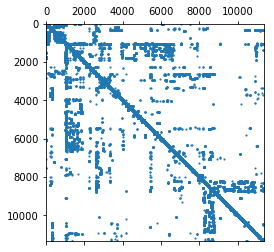

In [10]:
plt.spy(H, markersize = 1)
plt.savefig('./plots/adjacency_matrix.png', format='PNG', dpi = 300)

In [11]:
nx.google_matrix(G)

matrix([[1.32065504e-05, 8.34653988e-03, 8.34653988e-03, ...,
         1.32065504e-05, 1.32065504e-05, 1.32065504e-05],
        [4.25013207e-01, 1.32065504e-05, 4.25013207e-01, ...,
         1.32065504e-05, 1.32065504e-05, 1.32065504e-05],
        [7.95713178e-03, 7.95713178e-03, 1.32065504e-05, ...,
         1.32065504e-05, 1.32065504e-05, 1.32065504e-05],
        ...,
        [1.32065504e-05, 1.32065504e-05, 1.32065504e-05, ...,
         1.32065504e-05, 1.32065504e-05, 1.32065504e-05],
        [1.32065504e-05, 1.32065504e-05, 1.32065504e-05, ...,
         1.32065504e-05, 1.32065504e-05, 1.32065504e-05],
        [1.32065504e-05, 1.32065504e-05, 1.32065504e-05, ...,
         1.32065504e-05, 1.32065504e-05, 1.32065504e-05]])

In [14]:
pagerank_scores_dict =nx.pagerank(G)
# pagerank_scores_dict

In [27]:
vals = [pagerank_scores_dict[key] for key in pagerank_scores_dict.keys()]
test_dic = {'vals' : vals, 'k': pagerank_scores_dict.keys()}
df = pd.DataFrame(test_dic)
df = df.sort_values('vals')
df.tail()

,vals,k
304,0.002323,11125
310,0.002327,11132
307,0.002327,11129
2610,0.002551,7429
1063,0.002759,545


In [26]:
df = df.sort_values('k')

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(1.5*6.4, 4.8), tight_layout=True)
vals = [pagerank_scores_dict[key] for key in pagerank_scores_dict.keys()]

ax.plot(df.k, df.vals, 'o', markersize = 2)
# ax.plot(df.k, df.vals, ':')
ax.grid(ls = ':')
# ax.set_xlim(0,100)
fig.savefig('./plots/pagerank_score_larger.png', dpi = 300)

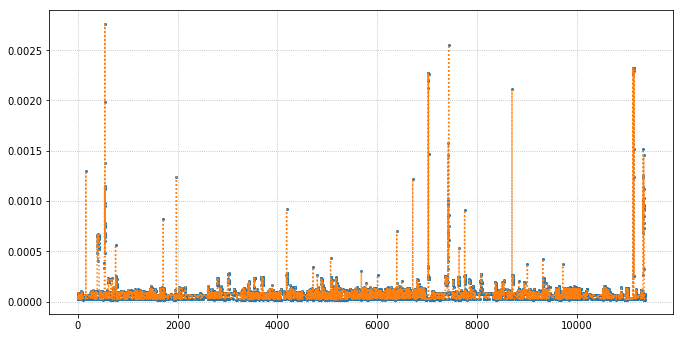

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(1.5*6.4, 4.8), tight_layout=True)
vals = [pagerank_scores_dict[key] for key in pagerank_scores_dict.keys()]

ax.plot(df.k, df.vals, 'o', markersize = 2)
ax.plot(df.k, df.vals, ':')
ax.grid(ls = ':')


In [22]:
hits_dict = nx.hits(G)
vals_hits0 = [hits_dict[0][key] for key in hits_dict[0].keys()]
vals_hits1 = [hits_dict[1][key] for key in hits_dict[1].keys()]

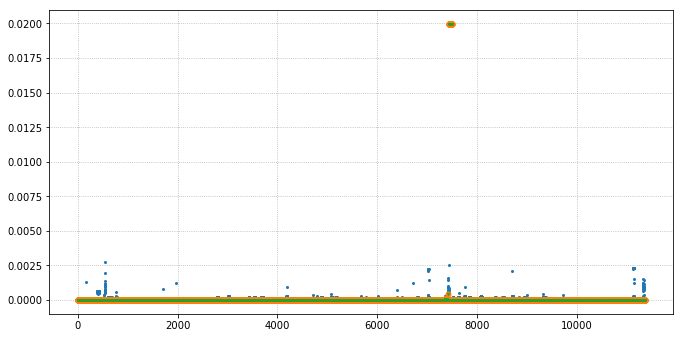

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(1.5*6.4, 4.8), tight_layout=True)
# ax.axis("off")

ax.plot(pagerank_scores_dict.keys(),vals, 'o', markersize = 2)
ax.plot(hits_dict[0].keys(),vals_hits0, 'o', markersize = 5)
ax.plot(hits_dict[1].keys(),vals_hits1, 'v', markersize = 2)
ax.grid(ls = ':')
# ax.set_xlim(0,100)
# fig.savefig('./plots/pagerank_score_larger.png')